In [24]:
import pandas as pd
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [25]:
import pandas as pd
music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
Y = music_data['genre']
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
Y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X.values, Y)
predictions = model.predict([[21,1], [22,0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
Y = music_data['genre']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

score = accuracy_score(Y_test, predictions)
score

1.0

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
Y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X.values, Y)

joblib.dump(model, 'music-recommender.joblib')

#predictions = model.predict([[21,1]])

['music-recommender.joblib']

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# music_data = pd.read_csv('music.csv')
# X = music_data.drop(columns=['genre'])
# Y = music_data['genre']

# model = DecisionTreeClassifier()
# model.fit(X.values, Y)

model = joblib.load('music-recommender.joblib')
predictions = model.predict([[21,1]])
predictions

array(['HipHop'], dtype=object)

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
Y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X.values, Y)

tree.export_graphviz(model, out_file = 'music-recommender.dot', feature_names = ['age', 'gender'], class_names=sorted(Y.unique()), 
                     label = 'all', rounded=True, filled=True)                    

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]\nclass = Acoustic'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'age <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 3, 0, 0]\nclass = Acoustic'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 0, 3, 3]\nclass = HipHop'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = Classical'),
 Text(0.6875, 0.75, '  False')]

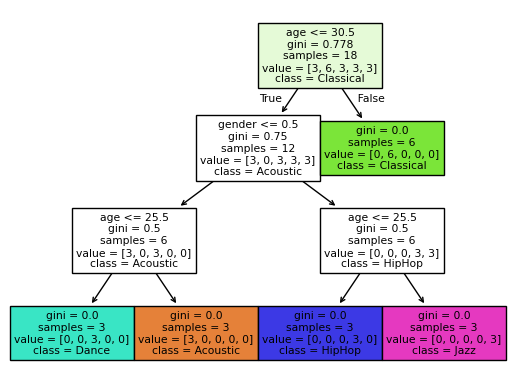

In [31]:
tree.plot_tree(model, feature_names = ['age', 'gender'],
                    class_names = sorted(Y.unique()),
                     filled = True)